In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from house_prices_kaggle_functions import *

# Data

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

# EDA

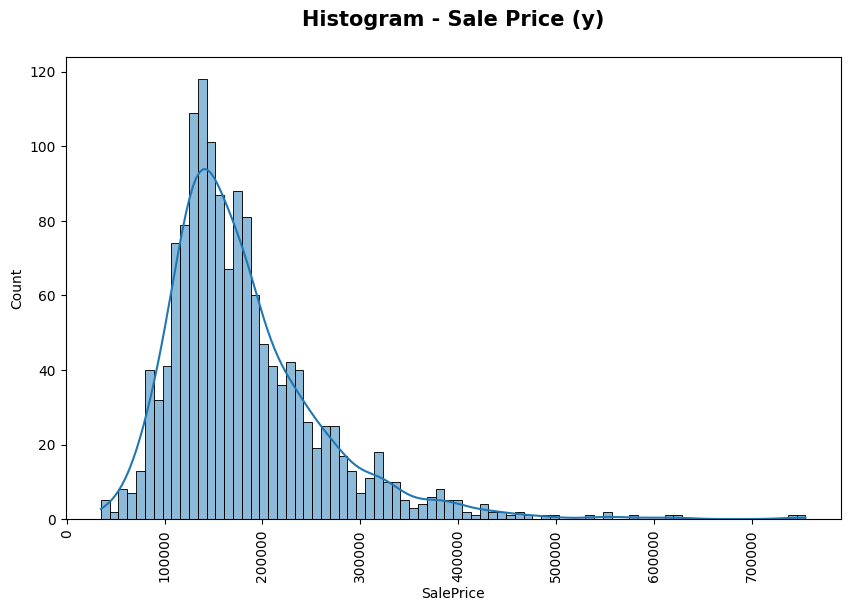

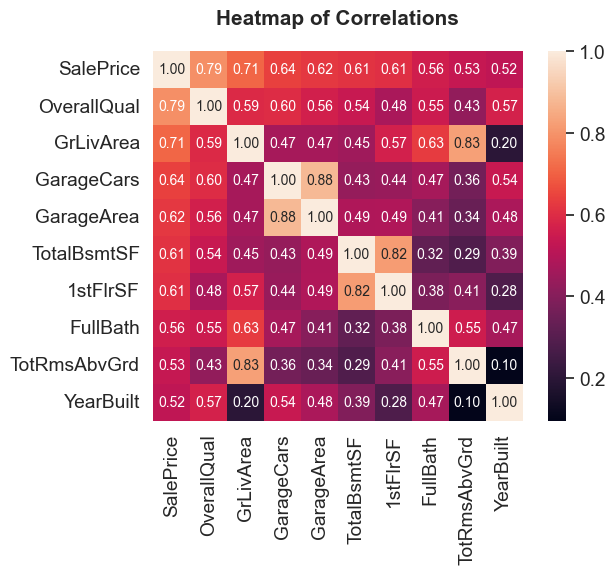

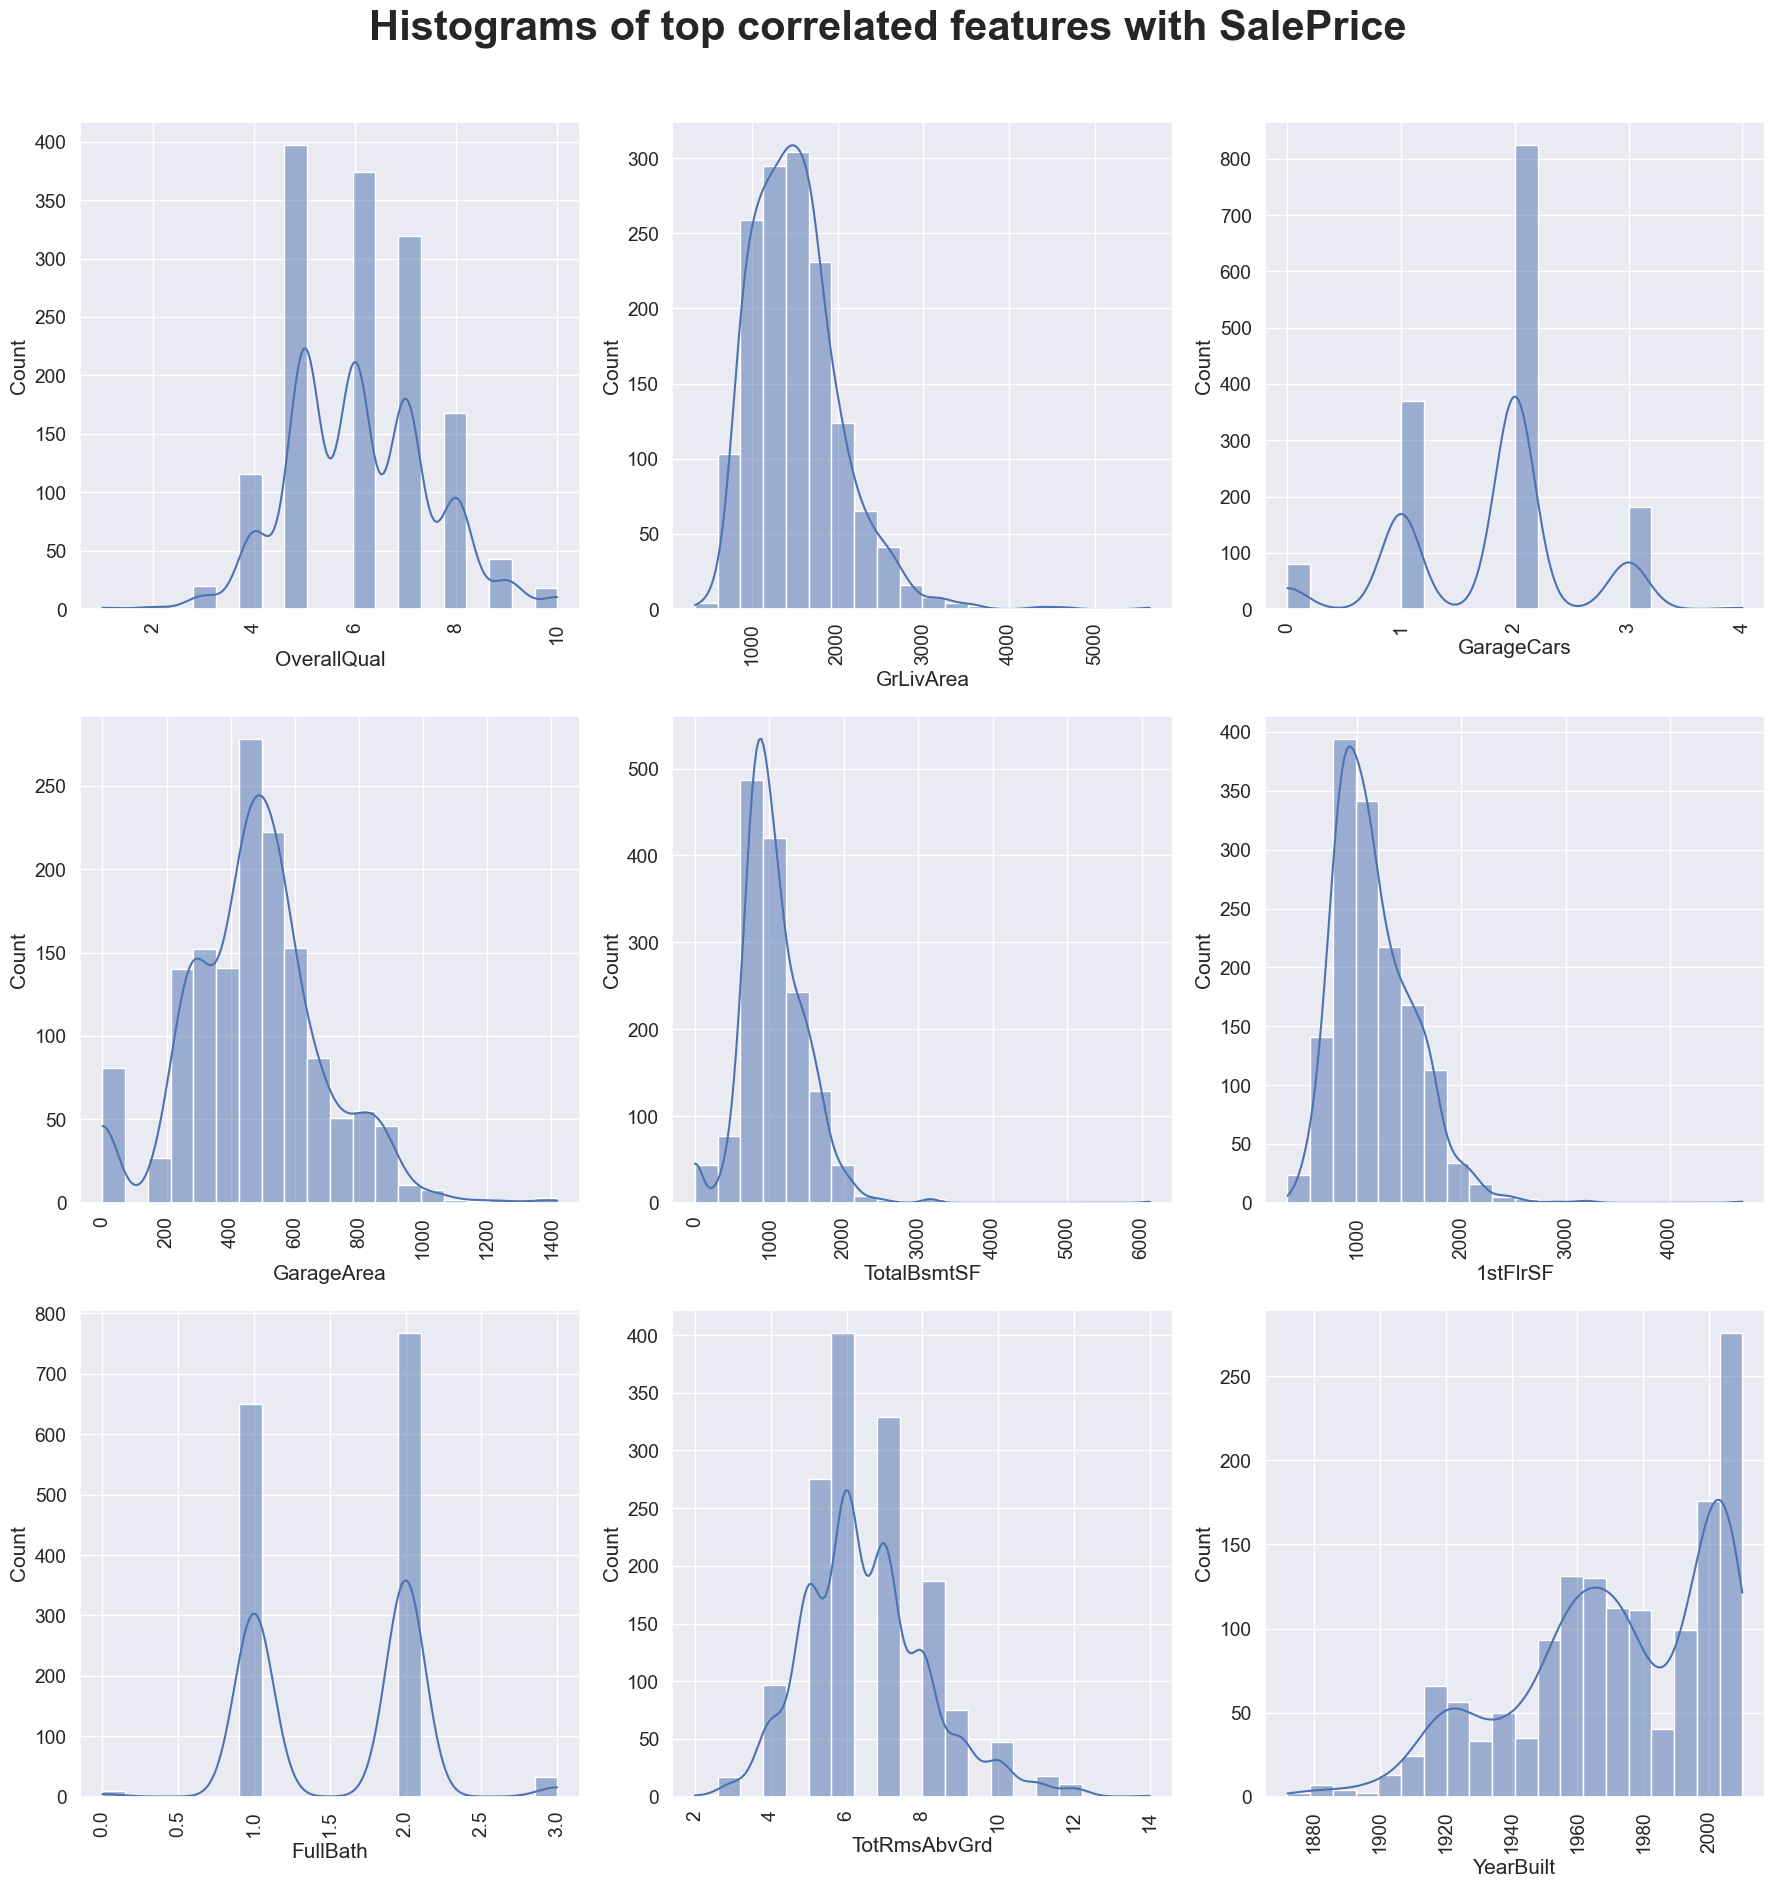

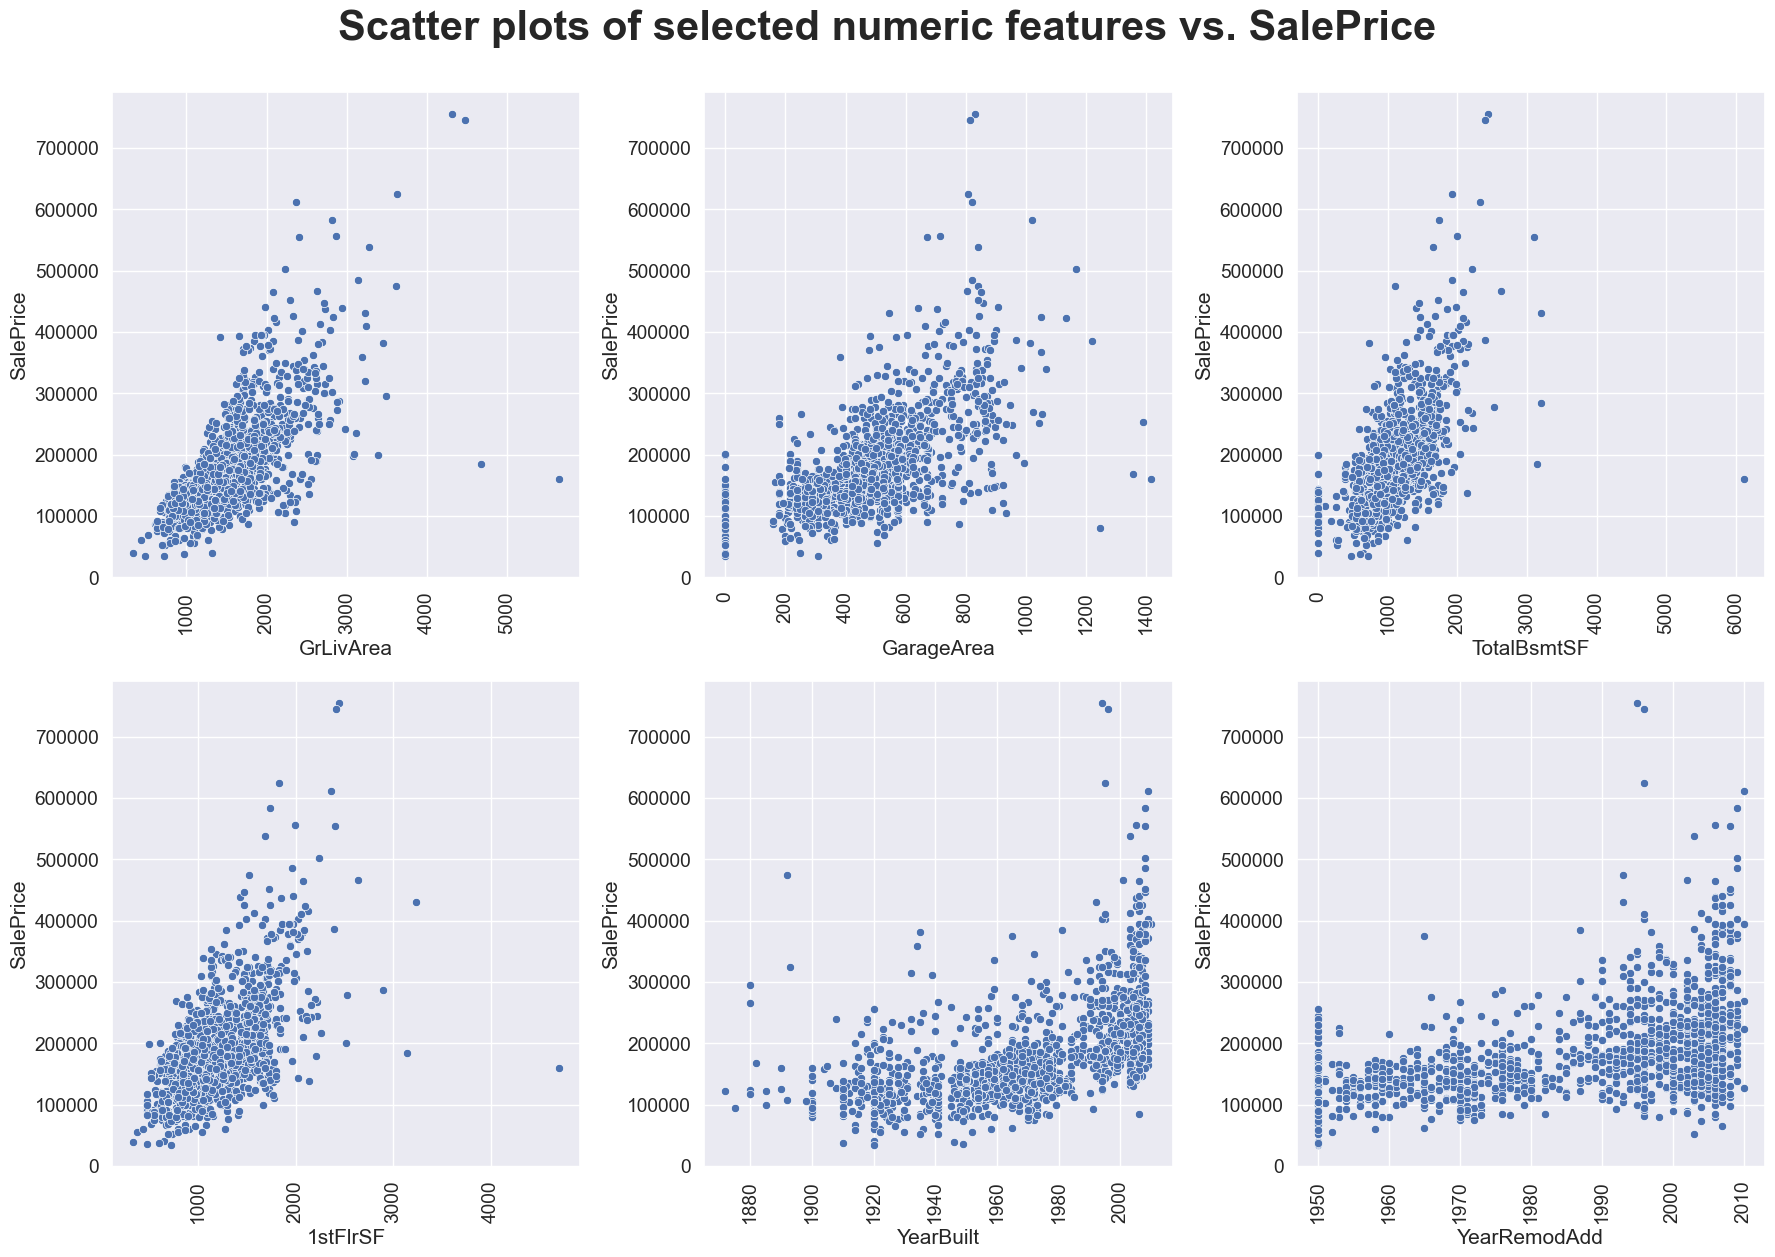

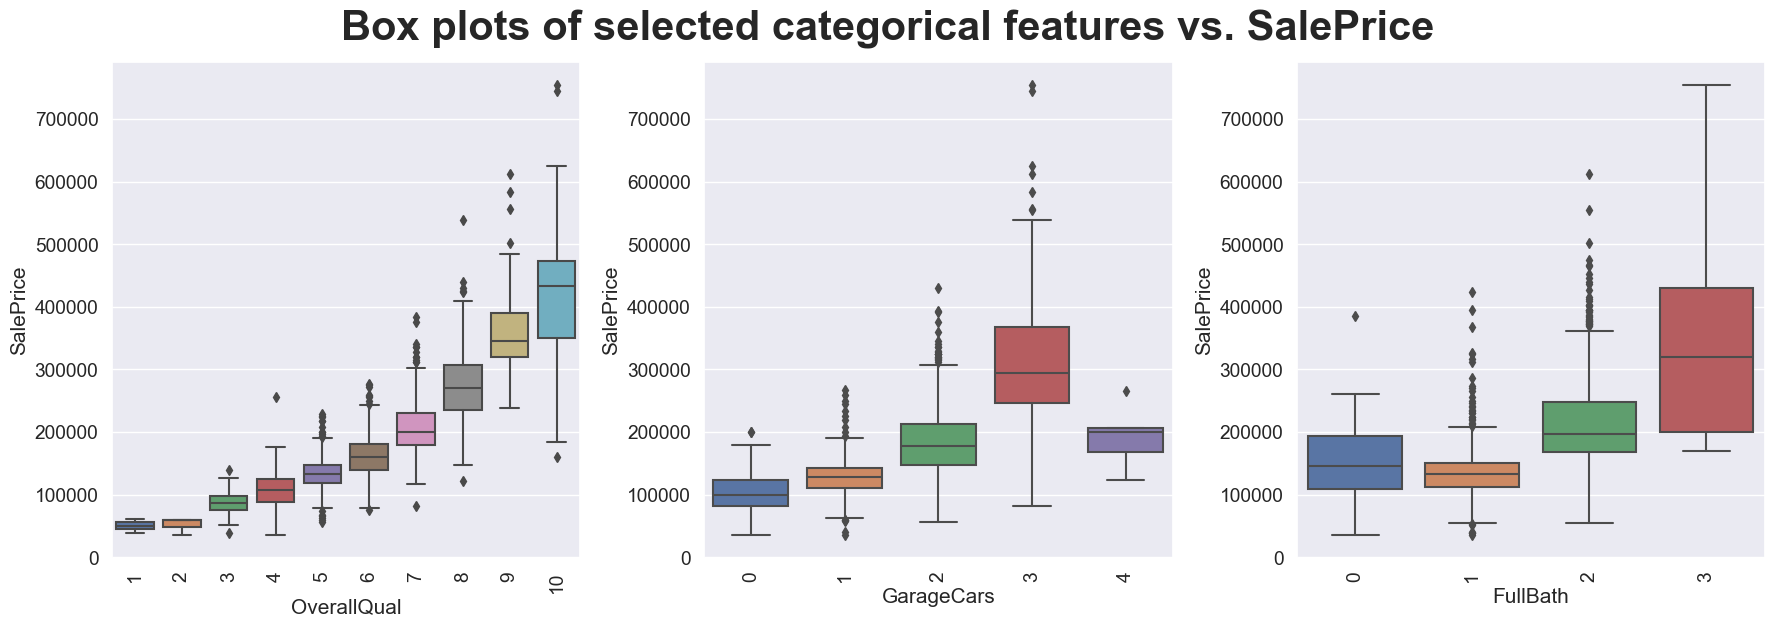

In [4]:
eda(df_train)

# Pipeline

In [5]:
X_train=transform(df_train)
y_train=df_train['SalePrice']

In [6]:
y_train_log = np.log(y_train)

In [7]:
impute = SimpleImputer (missing_values=np.nan, strategy="mean")
poly = PolynomialFeatures(2, include_bias=False, interaction_only=True)
scale = StandardScaler()
model = LinearRegression()
complete_proces = make_pipeline(impute, poly, scale, model)

In [8]:
complete_proces.fit(X_train,y_train_log)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
X_test=transform(df_test)

In [10]:
y_hat_log=complete_proces.predict(X_test)

In [11]:
y_hat=np.exp(y_hat_log)

In [12]:
test_prediction = pd.DataFrame({'id': df_test['Id'], 'SalePrice': y_hat})

In [13]:
test_prediction

,id,SalePrice
0,1461,128438.341384
1,1462,158605.963006
2,1463,184476.630639
3,1464,189117.574640
4,1465,182215.070266
...,...,...
1454,2915,91096.233595
1455,2916,107386.376975
1456,2917,141712.764172
1457,2918,113605.654256


In [14]:
test_prediction.to_csv('predict_pipeline.csv', index=False)